Model

Regression

Optimization


EDA -- Exploratory Data Analysis

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/bank_marketing_training'
bank_train = pd.read_csv(url)
bank_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,312,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,195,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,38,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,342,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [ ]:
bank_train['index'] = pd.Series(range(0,26874))

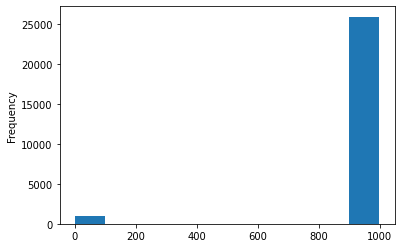

In [ ]:
bank_train['days_since_previous'].plot(kind = 'hist')

In [ ]:
import numpy as np
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999: np.NaN})

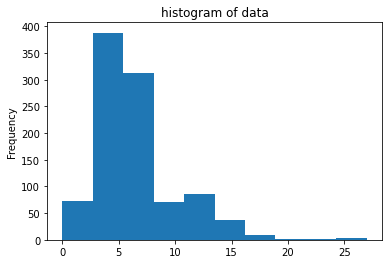

In [ ]:
bank_train['days_since_previous'].plot(kind = 'hist', title = 'histogram of data')

misleading values --> NaN, or median or mean or by random numbers


we change a distribution by changing its mean and std

In [ ]:
bank_train['education_numeric'] = bank_train['education']
dict_edu = {"education_numeric": {"illiterate": 0, "basic.4y": 4, "basic.6y": 6,     "basic.9y": 9, "high.school":12, "professional.course": 12, "university.degree":16, 'unknown': np.NaN}}
bank_train.replace(dict_edu, inplace = True)
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,26869,16.0
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,26870,16.0
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9.0,1,success,-1.1,94.767,-50.8,1.028,4963,no,26871,4.0
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,26872,12.0


In [ ]:
from scipy import stats
bank_train['age_z'] = stats.zscore(bank_train['age'])

In [ ]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN,0.097330
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0,-1.056506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,26869,16.0,-0.383435
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,26870,16.0,-0.287282
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9.0,1,success,-1.1,94.767,-50.8,1.028,4963,no,26871,4.0,-1.056506
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,26872,12.0,3.174226


In [ ]:
bank_train['age'].mean()

39.987757684006844

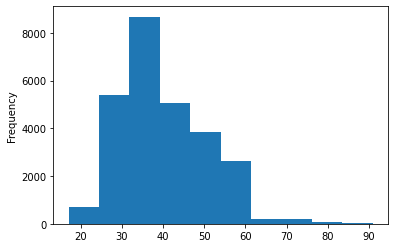

In [ ]:
bank_train['age'].plot(kind = 'hist')

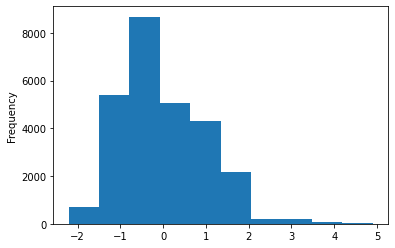

In [ ]:
bank_train['age_z'].plot(kind = 'hist')

In [ ]:
bank_train_outliers = bank_train.query('age_z > 3' or 'age_z < -3')

In [ ]:
bank_train_sort = bank_train.sort_values(['age_z'], ascending = False)

In [ ]:
bank_train_sort[['age', 'marital']].tail(n=15)

,age,marital
26360,18,single
25499,18,single
19802,18,single
23429,18,single
18172,18,single
25860,18,single
25208,18,single
25849,18,single
25364,18,single
25850,18,single


bar graphs with response overlay

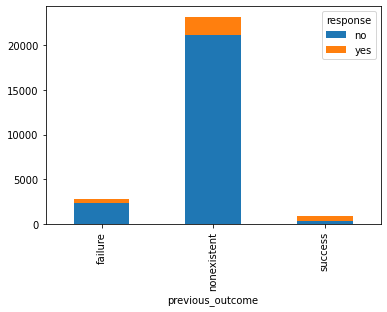

In [ ]:
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_01.plot(kind='bar', stacked = True)

the following plot is the normalized version of the previous one.

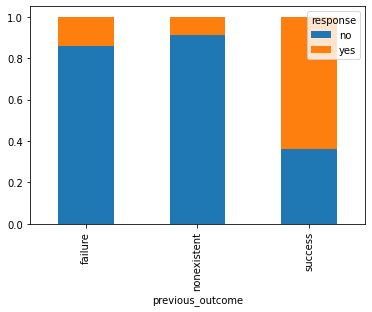

In [ ]:
crosstab_norm.plot(kind='bar', stacked = True)

Hypothesis: there is a higher chance of yes if the previous outcome was success.

(we can perform a t-test to evaluate our hypothesis)

# contingency tables

In [ ]:
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])

crosstab_02 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'],)

In [ ]:
round(crosstab_02.div(crosstab_02.sum(0),axis = 1)*100,1)

previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
bt_age_y = bank_train[bank_train.response == 'yes']['age']
bt_age_n = bank_train[bank_train.response == 'no']['age']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


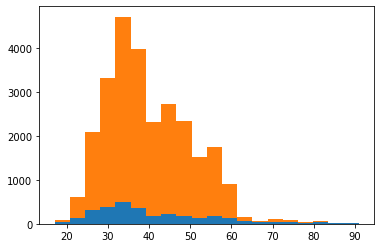

In [ ]:
plt.hist([bt_age_y,bt_age_n], bins = 20, stacked = True)

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


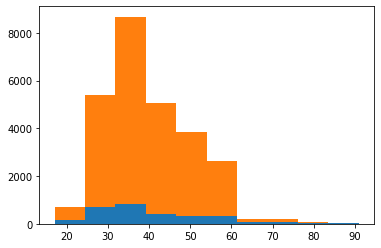

In [ ]:
(n, bins, patches) = plt.hist([bt_age_y, bt_age_n], bins = 10, stacked = True)
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

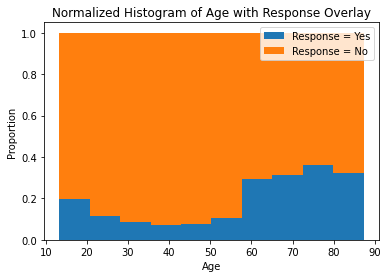

In [ ]:
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0],
bottom = n_norm[:,0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); plt.show()

In [ ]:
bank_train['age_binned'] = pd.cut(x = bank_train['age'], bins = [0, 27, 60.01, 100],
     labels=["Under 27", "27 to 60", "Over 60"], right = False)

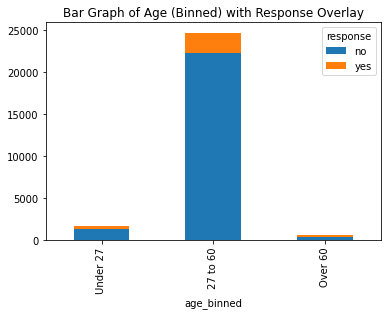

In [ ]:
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_02.plot(kind='bar', stacked = True,
       title = 'Bar Graph of Age (Binned) with Response Overlay')

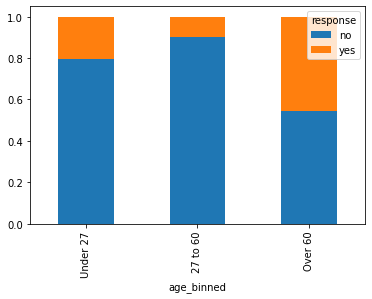

In [ ]:
crosstab_02_norm = crosstab_02.div(crosstab_02.sum(1), axis = 0)
crosstab_02_norm.plot(kind='bar', stacked = True)

Model : is a valid simplified representation of reality 

![alt text](https://miro.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

we want to predict someone's heigth based ontheir weigth

H = a * W + b

We are looking for a and b to have the best fit in our data.

what is the best fit: where data is "equally" distributed below and above our regression line.

# optimization

every predictive problem can boiled down to an optimization problem, because we want to minimize teh error (or difference between model output and actual outputs)


In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  


import seaborn as seabornInstance # this is a good library for plotting


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/ArashVafa/Examples/master/Weather.csv'
dataset = pd.read_csv(url)
dataset.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119039,82506,1945-12-31,0,NaN,29.444444,17.222222,23.333333,0,NaN,45,12,31,0,NaN,NaN,85.0,63.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


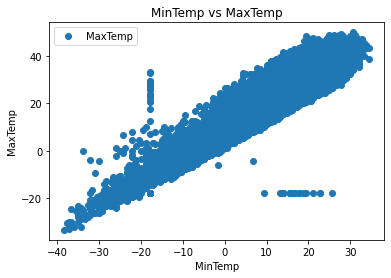

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

Simple Linear Regression means that we have one independent variable and one dependent variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


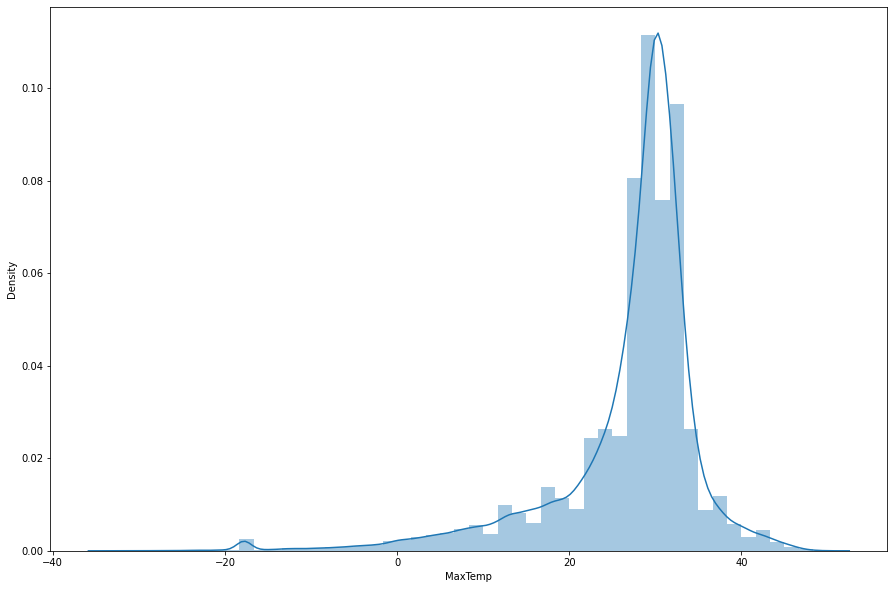

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [ ]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

# Splitting

We split the dataset in order to gauge the performance of our model by unseen data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)